Based on _fredrikwahlberg_'s notebook

In [1]:
import numpy as np              # Vector math
import pytesseract              # OCR
import matplotlib.pyplot as plt # Plotting
from PIL import ImageFont, ImageDraw, Image
%matplotlib inline

In [7]:
["/usr/share/fonts/dejavu/DejaVuSans-ExtraLight.ttf",
"/usr/share/fonts/liberation/LiberationMono-BoldItalic.ttf",
"/usr/share/fonts/dejavu/DejaVuSansMono-Bold.ttf",
"GentiumPlus-R.ttf",
"GentiumPlus-I.ttf",
"KGFeeling22.ttf",
"comicz.ttf",
"fell-english-r.ttf",
"fell-english-it.ttf",
"ocr-aregular.ttf",
"chfraktur.ttf"]
FONTS = []
TEXTFILE = "zprava.txt"
LANG = "ces"

## Prepare text

Read a text file and split long lines.

In [2]:
def breaklines(text, char_limit=60):
    settext = []
    for par in text.split("\n"):
        chunk = []
        chunk_len = 0
        for word in par.split(" "):
            if len(word) + chunk_len > char_limit:
                settext.append(" ".join(chunk))
                chunk = []
                chunk_len = 0
            chunk.append(word)
            chunk_len += len(word)
        splitpar = " ".join(chunk)
        if splitpar:
            settext.append(splitpar)
    return "\n".join(settext)

#file = "Eisenhower.txt"
file = "zprava.txt"

# Read in some text
with open(file, 'r') as file:
    original_text = file.read()

original_text = breaklines(original_text)
print(original_text)

Facebook se brání kritice tak, že v nejlepším politickém stylu hledá
špínu na své oponenty. Dělá to však neobratně a škodu zřejmě utrpí
hlavně on sám.
Facebook letos nemá dobrý rok. Od jeho začátku je pod palbou kritiky:
protože umožňuje politickou propagandu zahraničních subjektů a
jejich vměšování do voleb v různých zemích, protože se neumí vypořádat
s hate speech neboli projevy nenávisti, protože se s nimi vypořádává až
příliš důkladně… V březnu vypukla aféra Cambridge Analytica, během
níž si mnoho uživatelů uvědomilo, k čemu využívá sociální médium
jejich osobní data a jak lze facebookové profily využít k manipulaci
celou společností. Objektivně vzato to nebylo nic nového, ale poprvé
se o tom začalo skutečně mluvit a přemýšlet. Akcie klesly, tehdy ještě
dočasně.
Následoval vzestup, ale od července kurs znovu klesá. Investoři
začali posuzovat Facebook jako mírně poškozené zboží a pozorněji
sledovat jeho finanční výsledky, které ostatně opravdu nejsou tak
skvělé, jak bývalo zvykem. A

## Render text with a custom font

Run Tesseract.

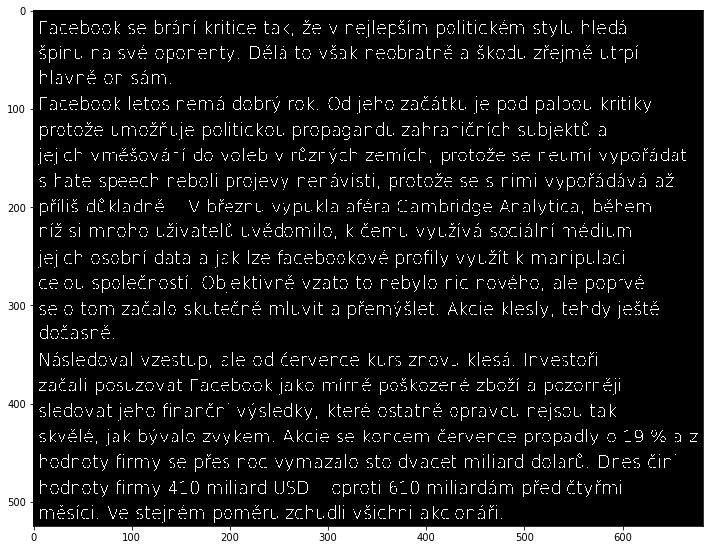

In [9]:
def render_text(texttorender, ptsize, fontfile, linespacing=0):
    font = ImageFont.truetype(fontfile, ptsize)
    # Create a dummy image, draw text and find out its size 
    pimg = Image.new('L', (1, 1))
    draw = ImageDraw.Draw(pimg)
    x,y = draw.textsize(texttorender, font=font, spacing=linespacing)
    # Create a new image large enough for the text
    pimg = Image.new('L', (x+10,y+14))
    draw = ImageDraw.Draw(pimg)
    draw.text((5,7), texttorender, fill=1, font=font, spacing=linespacing)
    img = np.array(pimg,dtype=np.uint8)
    return img

def render_text_gray(texttorender, ptsize, fontfile, linespacing=0):
    # To introduce the gray edges, we generate the text 
    # in a larger scale and then shrink it down.
    # We also need to use RGB, since Pillow does not have grayscale mode 
    rf = 4 #resize factor
    ############
    font = ImageFont.truetype(fontfile, rf*ptsize)
    pimg = Image.new("RGB", (1, 1))
    draw = ImageDraw.Draw(pimg)
    x,y = draw.textsize(texttorender, font=font, spacing=rf*linespacing)
    pimg = Image.new("RGB", (x+10*rf,y+15*rf))
    draw = ImageDraw.Draw(pimg)
    draw.text((5*rf,5*rf), texttorender, fill=(255,255,255), font=font, spacing=rf*linespacing)
    pimg_resized = pimg.resize((x//rf,y//rf), Image.BICUBIC)
    img = np.array(pimg_resized,dtype=np.uint8)[:,:,0]
    return img

#fontfile="/usr/share/fonts/dejavu/DejaVuSans-ExtraLight.ttf"
#fontfile="/usr/share/fonts/liberation/LiberationMono-BoldItalic.ttf"
#fontfile="/usr/share/fonts/dejavu/DejaVuSansMono-Bold.ttf"
#fontfile="GentiumPlus-R.ttf"
#fontfile="GentiumPlus-I.ttf"
#fontfile="KGFeeling22.ttf"
#fontfile="comic.ttf"
#fontfile="fell-english-r.ttf"
#fontfile="fell-english-it.ttf"
#fontfile="ocr-aregular.ttf" # no CZ characters
#fontfile="chfraktur.ttf" # no CZ characters

image_with_text = render_text(original_text, 18, fontfile=fontfile, linespacing=9)
#image_with_text = render_text_gray(original_text, 18, fontfile=fontfile, linespacing=9)

plt.figure(figsize=(12, 12))
plt.imshow(image_with_text, cmap='gray');

In [6]:
extracted_text = pytesseract.image_to_string(image_with_text, lang="ces")
extracted_text = extracted_text.replace("\n\n","\n")
print(extracted_text)

Facebook se brání krjtjce tak, že v ne jrepsjrn pohtjckern styru hredá
špínu na sve oponenty. berá to však neobratne a skodu zřejmě utrpí
hravne on sám.
Facebook retos nerná dobry rok. Od jeho začátku je pod parbou krjtjky
protože umožnuje poHHckou propagandu žahranjcnjch subjektů a
je jjch vměšování do voreb v různých zemích, protože se neumí vypořádat
s hate speech neboH projevy nenávjstj, protože se s njrnj vyporádává až
prms důkradne „ v březnu vypukra afera Cambrjdge Anarytjca, během
níž si mnoho užjvaterů uvědomHo, k cemu využívá socjárnj medjurn
je jjch osobní data a jak rže facebookove profjry využít k rnanjpuracj
cerou sporecnostj. Objektjvne vžato to nebyro m'c noveho, are poprve
se o tom žacaro skutecne rnruvjt a premysret. Akcje kresry, tehdy ještě
docasne.
Násredovar vžestup, are od července kurs žnovu kresá.1nvestorj
zaČaH posužovat Facebook jako mírně poškozené zboží a požornejj
sredovat jeho fjnancnj vysredky, ktere ostatne opravdu nejsou tak
skvere, jak byvaro žvykern.

# Evaluation

A common metric of quality of the OCR is the word error rate, i.e. the number of non-recognised words in relation to the total number of words. This can be done by flexibly matching the original text with the text returned from the OCR.

A big thanks to https://martin-thoma.com/word-error-rate-calculation/ for sharing their code on Levenshtein distance.

In [ ]:
from borrowed_code import wer
#print(wer.__doc__)

In [ ]:
print(original_text.split()[:20])
print(extracted_text.split()[:20])
we = wer(original_text.split(), extracted_text.split())
print("Word errors:", we)
print("WER:", we/max(len(original_text.split()), len(extracted_text.split())))

In [ ]:
print(list(original_text)[:20])
print(list(extracted_text)[:20])
ce = wer(list(original_text), list(extracted_text))
print("Character errors:", ce)
print("CER:", ce/max(len(list(original_text)), len(list(extracted_text))))